<a href="https://colab.research.google.com/github/Gayathri2234/sentimental-analysis/blob/main/nlpipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import csv
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv', sep = ",", error_bad_lines=False)
df.head()

<ipython-input-3-cb990dc104ea>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv', sep = ",", error_bad_lines=False)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment Data Distribution')

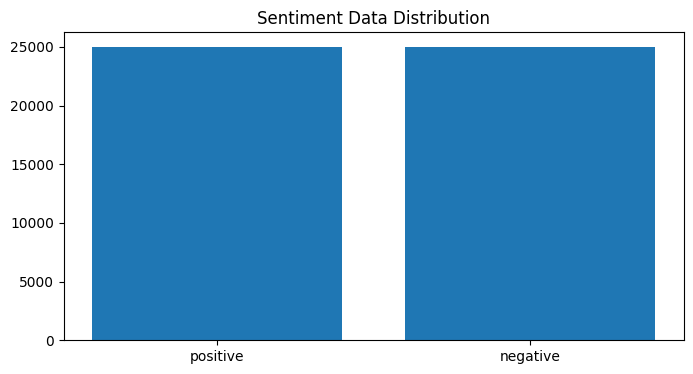

In [5]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [6]:
df.describe()


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
df.drop_duplicates(subset=['review'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [8]:
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [9]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]"

In [10]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [11]:
to_clean = re.compile('<.*?>')

In [12]:
def preprocess1(text, stem=False):
  text = re.sub(to_clean, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [13]:
df.review = df.review.apply(lambda x: preprocess1(x))

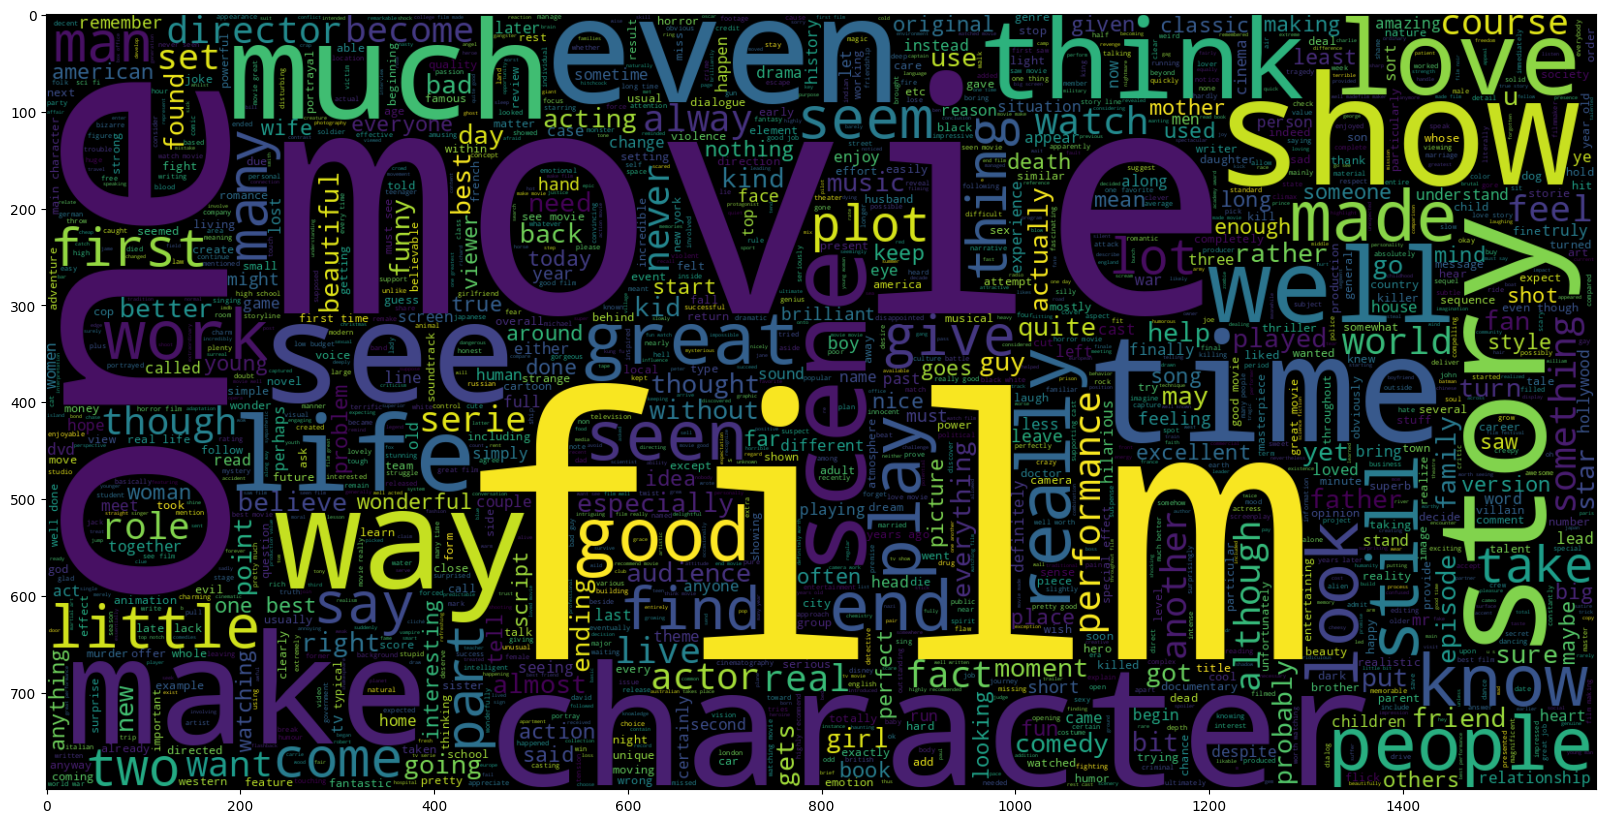

In [14]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'positive'].review))
plt.imshow(wc , interpolation = 'bilinear')

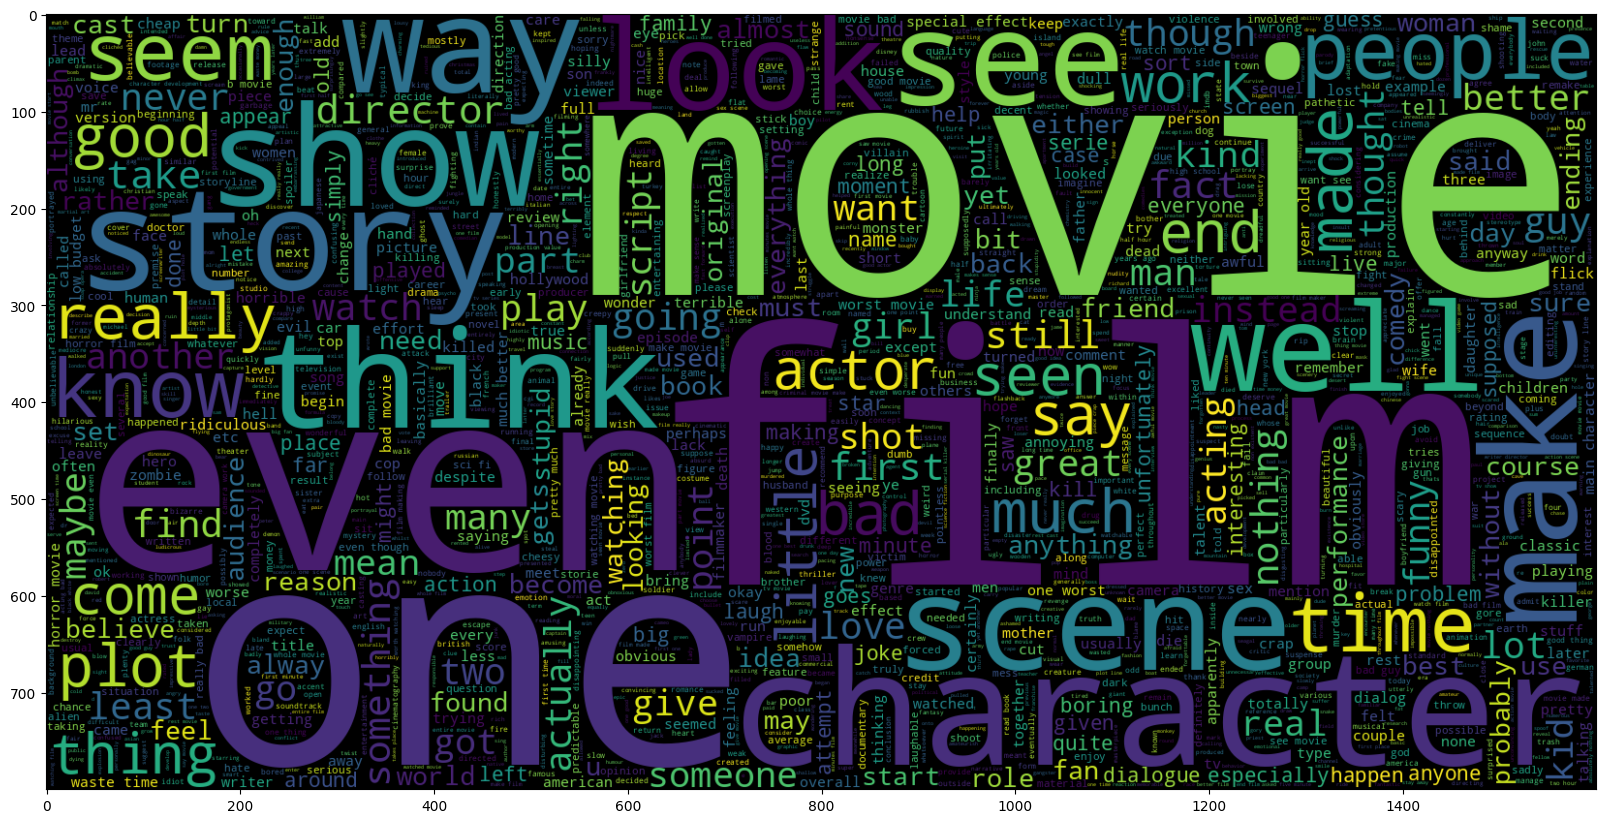

In [15]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'negative'].review))
plt.imshow(wc , interpolation = 'bilinear')

In [16]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30


In [17]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 39665
Test Data size 9917


In [18]:
train_data.head(10)


,review,sentiment
38286,"ok, lets start best. building. although hard b...",negative
46466,"ok, here's short it... movie full corny dialog...",negative
21605,time extraordinary things. ultimate judge. tim...,positive
13675,say movie really quite awful. acting average p...,negative
9220,although there's flying guillotines part title...,negative
23214,changing world cg what-not cartoon animations ...,positive
26260,hey army sgt. i'm sorry dude sgt army army nat...,positive
21578,try look another movie trip without story plot...,positive
35131,"secret fury, many ways run-of-the-mill romanti...",positive
27112,"really troma movie? scenes almost ""a"" movie lo...",positive


In [19]:
train_data.shape

(39665, 2)

In [20]:
test_data.shape

(9917, 2)

In [21]:
!pip install simpletransformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.0 MB

In [22]:
from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [23]:
def making_label(st):
    if(st=='positive'):
        return 0
    elif(st=='neutral'):
        return 2
    else:
        return 1

train_data['label'] = train_data['review'].apply(making_label)
test_data['label'] = test_data['review'].apply(making_label)
print(train_data.shape)

(39665, 3)


In [24]:
train_df = pd.DataFrame({
    'text': train_data['review'].replace(r'\n', ' ', regex=True),
    'label': train_data['label']
})

eval_df = pd.DataFrame({
    'text': test_data['review'].replace(r'\n', ' ', regex=True),
    'label': test_data['label']
})

In [25]:
train_df.shape

(39665, 2)

In [26]:
train_df.head()


,text,label
38286,"ok, lets start best. building. although hard b...",1
46466,"ok, here's short it... movie full corny dialog...",1
21605,time extraordinary things. ultimate judge. tim...,1
13675,say movie really quite awful. acting average p...,1
9220,although there's flying guillotines part title...,1


In [27]:
eval_df.shape

(9917, 2)

In [ ]:
model.train_model(train_df)
# 0%|          | 0/39665 [00:00<?, ?it/s]
Epoch:   0%|          | 0/1 [00:00<?, ?it/s]
Running Epoch 0 of 1:   0%|          | 0/4959 [00:00<?, ?it/s]
(4959, 0.0035506719231422576)


In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)
#0%|          | 0/9917 [00:00<?, ?it/s]
Running Evaluation:   0%|          | 0/1240 [00:00<?, ?it/s]

In [ ]:
result
#{'mcc': 0.0, 'eval_loss': 3.5396636620486877e-06}

In [ ]:
model_outputs
#array([[-5.03820658,  8.26282215, -4.929214  ],
       [-5.01897287,  8.2717514 , -4.9300828 ],
       [-5.02549744,  8.26619339, -4.93156195],
       ...,
       [-5.0284977 ,  8.27560806, -4.92863226],
       [-5.01683378,  8.26277065, -4.94038439],
       [-5.02215147,  8.26711941, -4.94381952]])

In [ ]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))


In [ ]:
true = eval_df['label'].tolist()
predicted = lst

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
def decode_sentiment(score):
    return "positive" if score>0.5 else "negative"


scores = model.predict(X_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]



In [ ]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()


In [ ]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

In [ ]:
df_cm = pd.DataFrame(mat, range(3), range(3))

sns.heatmap(df_cm, annot=True)
plt.show()
